# Climate Data Analysis for Portland, OR 

## Introduction

This report provides a comprehensive analysis of historical climate data collected from Portland International Airport in Portland, OR. Utilizing data from sources such as NOAA and USGS, the study examines key weather parameters, including air temperature, precipitation, and groundwater levels (GWL), spanning a time period from 2004 to 2024. The goal of this analysis is to identify patterns and trends in the data, specifically related to air temperature fluctuations, precipitation cycles, and seasonal variations in groundwater levels. By visualizing this data through charts and time series plots, this report aims to offer insights into Portland's climate behavior, the frequency of extreme weather events, and the effects of climate change over the last two decades.

## Set up 

In [1]:
pip install numpy==1.23.4  

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pandoc

In [3]:

# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandoc as pandoc

/Users/lauriezeng/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/lauriezeng/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.4' currently installed).
  from pandas.core import (
/Users/lauriezeng/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Analyzing Air Temperature

### Data Preperation

I am using the data from the Portland Airport weather station, beacasue it has a 98% rate of data coverage.

In [4]:
#data url: https://www.ncdc.noaa.gov/cdo-web/search
# get data from NOAA
df_portland=pd.read_csv('/Users/lauriezeng/Downloads/3799381.csv')
print(df_portland.head())


       STATION                                   NAME        DATE  PRCP  SNOW  \
0  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US  2004-01-01  0.25   1.7   
1  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US  2004-01-02  0.21   1.0   
2  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US  2004-01-03  0.02   0.0   
3  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US  2004-01-04  0.00   0.0   
4  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US  2004-01-05  0.00   0.0   

   SNWD  TAVG  TMAX  TMIN  
0   2.0  35.0    37    32  
1   2.0  38.0    41    35  
2   1.0  39.0    41    36  
3   0.0  31.0    37    24  
4   0.0  22.0    24    20  


In [5]:
#convert the data column to datetime format
#filter the columns for air temprature analysis
df_portland['DATE']=pd.to_datetime(df_portland['DATE'])

df_portland_air=df_portland[['DATE','TMAX','TMIN']]


#check if types of datatype are correct
df_portland_air.dtypes

DATE    datetime64[ns]
TMAX             int64
TMIN             int64
dtype: object

In [6]:
#check for the missing values
df_portland_air.isnull().sum()


DATE    0
TMAX    0
TMIN    0
dtype: int64

In [7]:
#rename the columns
df_portland_air.rename(columns={
    'DATE':'date',
    'TMAX':'max_temp',
    'TMIN':'min_temp'
},inplace=True

)

df_portland_air.head()

/var/folders/qr/19v993z57q535jfw7xggwbc00000gn/T/ipykernel_50918/2882262899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portland_air.rename(columns={


,date,max_temp,min_temp
0,2004-01-01,37,32
1,2004-01-02,41,35
2,2004-01-03,41,36
3,2004-01-04,37,24
4,2004-01-05,24,20


### Analyzing Air Tempreture Data

In [8]:
# min and max date in tghe dataset 
print('Min date: ',df_portland_air['date'].min())
print('Max date: ',df_portland_air['date'].max())

print("Number of days: ",df_portland.shape[0])

Min date:  2004-01-01 00:00:00
Max date:  2024-09-08 00:00:00
Number of days:  7557


In [9]:
#summary of the data
df_portland_air[['min_temp','max_temp']].describe()

,min_temp,max_temp
count,7557.000000,7557.000000
mean,46.683472,63.894006
std,10.184006,15.057865
min,11.000000,21.000000
25%,39.000000,52.000000
50%,47.000000,62.000000
75%,55.000000,75.000000
max,75.000000,116.000000


In [10]:
max_temp = df_portland_air['max_temp'].max()
hottest_days = df_portland_air[df_portland_air['max_temp'] == max_temp]['date']
hottest_day_string = hottest_days.dt.strftime('%Y-%m-%d').to_string(index=False)

min_temp = df_portland_air['min_temp'].min()
coldest_days = df_portland_air[df_portland_air['min_temp'] == min_temp]['date']
coldest_day_string = coldest_days.dt.strftime('%Y-%m-%d').to_string(index=False)


print("The hottest day over the past 20 years was:", hottest_day_string.strip())
print("The coldest day over the past 20 years was:", coldest_day_string.strip())


The hottest day over the past 20 years was: 2021-06-28
The coldest day over the past 20 years was: 2017-01-13


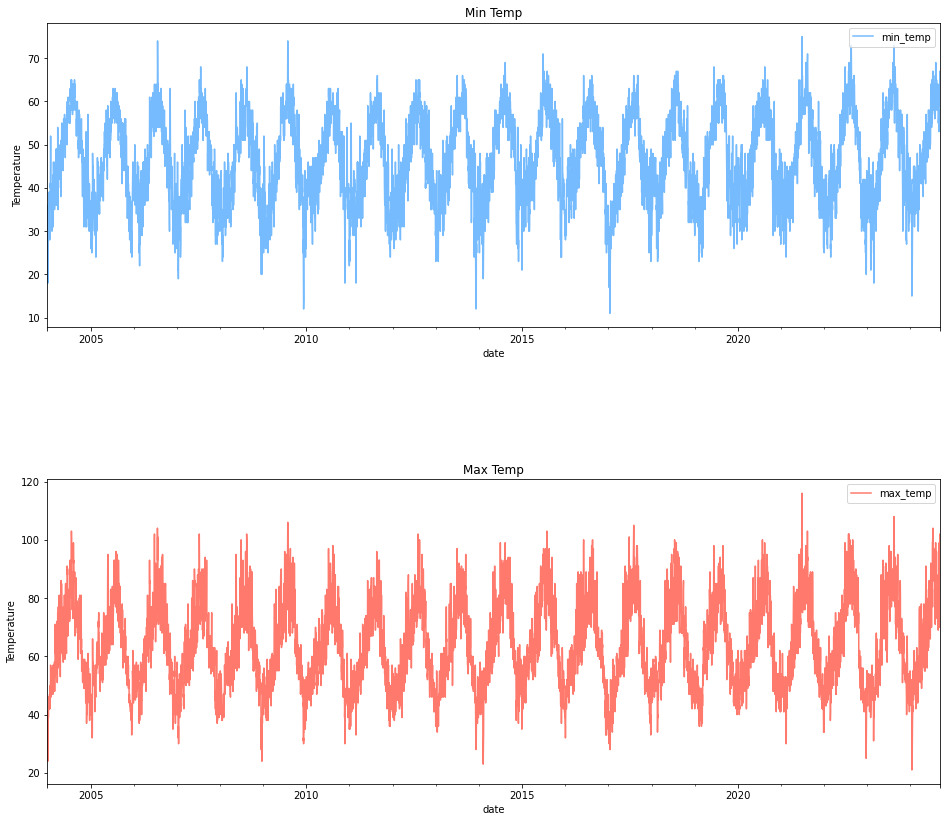

In [11]:
#plotting time series of min and max temp

#create a 1*2 grid of subplots
fig,ax=plt.subplots(2,1,figsize=(16,14))

#adjust the space between the subplots
plt.subplots_adjust(hspace=0.5)

#subplot for min temp
df_portland_air.plot(x='date',y='min_temp',ax=ax[0],color='xkcd:sky blue')
ax[0].set_title('Min Temp')
ax[0].set_ylabel('Temperature')


#subplot for max temp
df_portland_air.plot(x='date',y='max_temp',ax=ax[1],color='xkcd:salmon')
ax[1].set_title('Max Temp')
ax[1].set_ylabel('Temperature')

for i in range (2):
    ax[i].legend(loc='upper right')


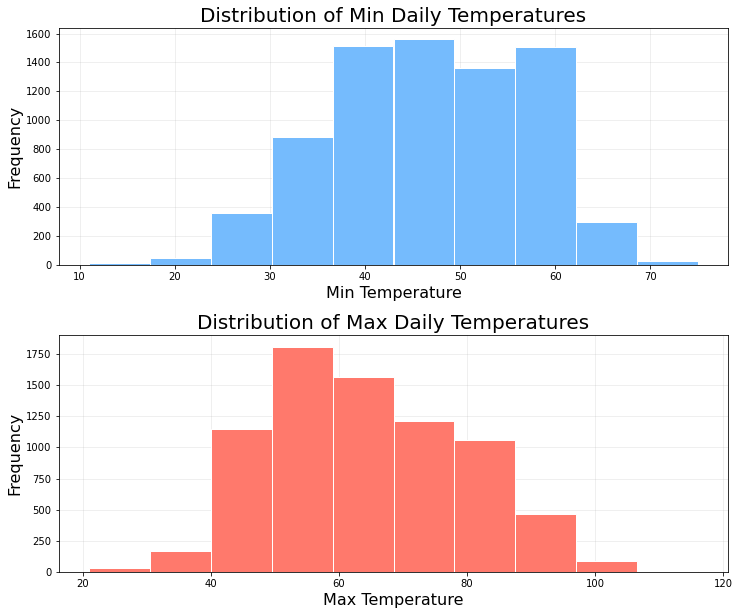

In [12]:
# plot the distribution 

fig,ax=plt.subplots(2,1,figsize=(12,10))
plt.subplots_adjust(hspace=0.5)


#plot for min_temp
df_portland_air.hist(column="min_temp", ax=ax[0], facecolor="xkcd:sky blue", edgecolor="white")
                                                      
# Add titles and labels 
ax[0].set_title("Distribution of Min Daily Temperatures", fontsize=20)
ax[0].set_xlabel("Min Temperature", fontsize=16)
ax[0].set_ylabel("Frequency", fontsize=16)

ax[0].grid(alpha=0.25)
ax[0].set_axisbelow(True)

#=======================================================================
#plot for max_temp
df_portland_air.hist(column="max_temp", ax=ax[1], facecolor="xkcd:salmon", edgecolor="white")

ax[1].set_title("Distribution of Max Daily Temperatures", fontsize=20)
ax[1].set_xlabel("Max Temperature", fontsize=16)
ax[1].set_ylabel("Frequency", fontsize=16)

ax[1].grid(alpha=0.25)
ax[1].set_axisbelow(True)

#### Finidings

- There is a clear seasonal pattern, with temperature lows dipping each year during the winter months and rising in the summer. This cyclical pattern is consistent throughout the years.
- The minimum  and maximum temperatures seem relatively consistent when comparing year-to-year extremes, although there are variations within the seasons. There are years with higher peaks and some with lower, but these do not form a clear pattern of change.

-  The distribution of minimum temperature shows a slight left skew, indicating more rare occurrences of extremely low minimum temperatures compared to high minimum temperatures.

- The distribution of max temperature is right-skewed, meaning there are more instances of higher maximum temperatures exceeding the common range (80°F-90°F) compared to lower extremes.

### Analyzing the Number hot days

In [13]:
# Excessive Heat Warning

##Western Oregon (including Portland and the Willamette Valley): Heat advisories might be issued when daytime temperatures are forecasted to exceed 90-95°F, especially if these conditions are expected to persist for multiple days.

In [14]:
df=df_portland_air

df['Year'] = df['date'].dt.year
hot_days = df.loc[df['max_temp'] > 90]

annual_hot_days = hot_days.groupby('Year').size()
annual_hot_days_df = annual_hot_days.reset_index(name='Count of Hot Days')

annual_hot_days_df


/var/folders/qr/19v993z57q535jfw7xggwbc00000gn/T/ipykernel_50918/3468907399.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = df['date'].dt.year


,Year,Count of Hot Days
0,2004,9
1,2005,14
2,2006,17
3,2007,4
4,2008,12
5,2009,20
6,2010,11
7,2011,6
8,2012,8
9,2013,7


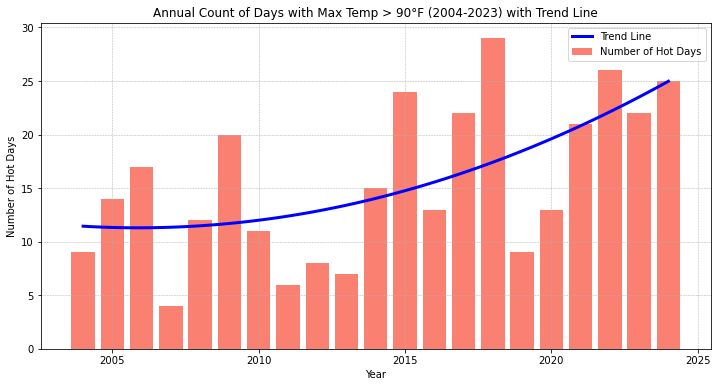

In [15]:

x = annual_hot_days.index.astype(int)  
y = annual_hot_days.values


coefficients = np.polyfit(x, y, 2)
# Generate a polynomial function from these coefficients
poly_func = np.poly1d(coefficients)

# Generate x values for the trend line (from min year to max year)
x_fit = np.linspace(x.min(), x.max(), 100)
y_fit = poly_func(x_fit)
# Start the plot
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(x, y, color='salmon', label='Number of Hot Days')

# Add the smooth trend line
plt.plot(x_fit, y_fit, color='blue', linewidth=3, label='Trend Line')

# Adding titles and labels
plt.title('Annual Count of Days with Max Temp > 90°F (2004-2023) with Trend Line')
plt.xlabel('Year')
plt.ylabel('Number of Hot Days')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend()

# Show the plot
plt.show()


#### Findings

- The plor shows a general upward trend in the number of days reaching over 90°F across the years. This suggests that over the last two decades, there has been an increase in hotter days, which could be indicative of warming trends in the area.
- The last few years on the graph show a higher frequency of hot days compared to earlier years, aligning with the upward trend shown by the trend line. This could suggest a more recent intensification of heat, possibly linked to climate change.

In [16]:
# take a look of the days in a year that is below freezing:

cold_days = df.loc[df['min_temp'] < 32]
annual_cold_days = cold_days.groupby('Year').size()
annual_cold_days_df = annual_cold_days.reset_index(name='Count of Cold Days')

annual_temperature_days_df = pd.merge(annual_hot_days_df, annual_cold_days_df, on='Year', how='outer')

# Fill NaN values with 0 if there are any years without hot or cold days
annual_temperature_days_df.fillna(0, inplace=True)

# Convert counts to integer if they were floats due to NaN filling
annual_temperature_days_df['Count of Hot Days'] = annual_temperature_days_df['Count of Hot Days'].astype(int)
annual_temperature_days_df['Count of Cold Days'] = annual_temperature_days_df['Count of Cold Days'].astype(int)

annual_temperature_days_df 

,Year,Count of Hot Days,Count of Cold Days
0,2004,9,17
1,2005,14,37
2,2006,17,23
3,2007,4,27
4,2008,12,26
5,2009,20,47
6,2010,11,10
7,2011,6,33
8,2012,8,18
9,2013,7,37


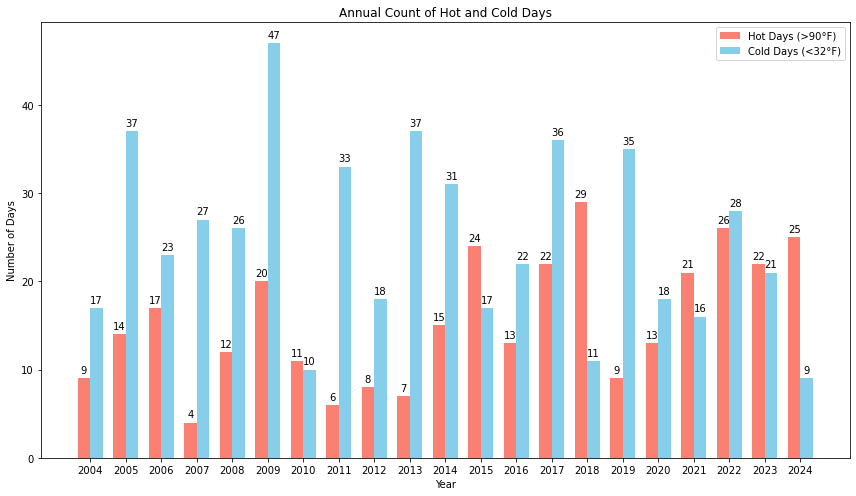

In [17]:
# Setting the positions and width for the bars
positions = np.arange(len(annual_temperature_days_df['Year']))
width = 0.35  # the width of the bars

# Start plotting
fig, ax = plt.subplots(figsize=(12, 7))

# Plotting the bars for hot days and cold days side by side
rects1 = ax.bar(positions - width/2, annual_temperature_days_df['Count of Hot Days'], width, label='Hot Days (>90°F)', color='salmon')
rects2 = ax.bar(positions + width/2, annual_temperature_days_df['Count of Cold Days'], width, label='Cold Days (<32°F)', color='skyblue')

# adding some text for labels, title and custom x-axis tick labels
ax.set_xlabel('Year')
ax.set_ylabel('Number of Days')
ax.set_title('Annual Count of Hot and Cold Days')
ax.set_xticks(positions)
ax.set_xticklabels(annual_temperature_days_df['Year'])
ax.legend()

#add labels on bars
def add_labels(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(rects1)
add_labels(rects2)

fig.tight_layout()
plt.show()

#### Findings

- While there appears to be a general upward trend in the number of hot days over the period, with some fluctuation,  the trend for cold days seems generally stable or slightly declining over the same period.

## Visualizing and Analyzing Precipitation Data


### Data Preperation

In [18]:
# get data from NOAA
df_portland=pd.read_csv('/Users/lauriezeng/Downloads/3799381.csv')
df_portland['DATE']=pd.to_datetime(df_portland['DATE'])
print(df_portland.head())


       STATION                                   NAME       DATE  PRCP  SNOW  \
0  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US 2004-01-01  0.25   1.7   
1  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US 2004-01-02  0.21   1.0   
2  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US 2004-01-03  0.02   0.0   
3  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US 2004-01-04  0.00   0.0   
4  USW00024229  PORTLAND INTERNATIONAL AIRPORT, OR US 2004-01-05  0.00   0.0   

   SNWD  TAVG  TMAX  TMIN  
0   2.0  35.0    37    32  
1   2.0  38.0    41    35  
2   1.0  39.0    41    36  
3   0.0  31.0    37    24  
4   0.0  22.0    24    20  


In [19]:
df_portland.dtypes

STATION            object
NAME               object
DATE       datetime64[ns]
PRCP              float64
SNOW              float64
SNWD              float64
TAVG              float64
TMAX                int64
TMIN                int64
dtype: object

In [20]:
# filter the columns we need
df_prcp=df_portland[['DATE','PRCP']]
df_prcp.dtypes

DATE    datetime64[ns]
PRCP           float64
dtype: object

In [21]:
# check for missing values
df_prcp.isnull().sum()

DATE    0
PRCP    0
dtype: int64

In [22]:
#rename the columns
df_prcp.rename(columns={
    'DATE':'date',
    'PRCP':'precipitation'},
    inplace=True

)

df_prcp.head()


/var/folders/qr/19v993z57q535jfw7xggwbc00000gn/T/ipykernel_50918/3517294883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prcp.rename(columns={


,date,precipitation
0,2004-01-01,0.25
1,2004-01-02,0.21
2,2004-01-03,0.02
3,2004-01-04,0.00
4,2004-01-05,0.00


### Analyzing Precipitation Tempreture Data

In [23]:
print ('Min Date: ', df_prcp['date'].min())
print ('Max Date: ', df_prcp['date'].max())

Min Date:  2004-01-01 00:00:00
Max Date:  2024-09-08 00:00:00


In [24]:
#summary of the dateset
df_prcp.describe()

,date,precipitation
count,7557,7557.000000
mean,2014-05-06 00:00:00.000000256,0.098850
min,2004-01-01 00:00:00,0.000000
25%,2009-03-04 00:00:00,0.000000
50%,2014-05-06 00:00:00,0.000000
75%,2019-07-08 00:00:00,0.100000
max,2024-09-08 00:00:00,2.670000
std,NaN,0.223106


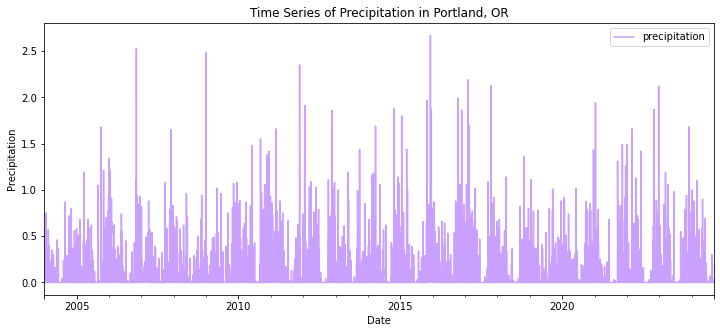

In [25]:
# plot the time series
fig, ax = plt.subplots(figsize=(12, 5))

df_prcp.plot(x='date',y='precipitation',ax=ax,color='xkcd:pastel purple')
plt.title('Time Series of Precipitation in Portland, OR')
plt.xlabel('Date')
plt.ylabel('Precipitation')

plt.show()



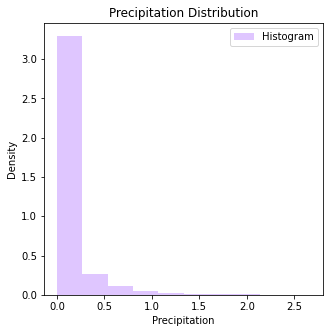

In [26]:
precipitation_data = df_prcp['precipitation'].dropna()
fig, ax = plt.subplots(figsize=(5, 5))

# Plot the histogram
ax.hist(df_prcp['precipitation'], bins=10, color='xkcd:pastel purple', alpha=0.6, label='Histogram', density=True)

# Add labels and title
ax.set_title('Precipitation Distribution')
ax.set_xlabel('Precipitation')
ax.set_ylabel('Density')

# Show legend
ax.legend()

# Show the plot
plt.show()


#### Findings

- The time series plot likely reflects seasonal precipitation patterns, where Portland experiences periods of high precipitation during certain times of the year (likely in winter and early spring).

- The precipitation distribution shows that most days have very low precipitation, and significant rain events are relatively infrequent.

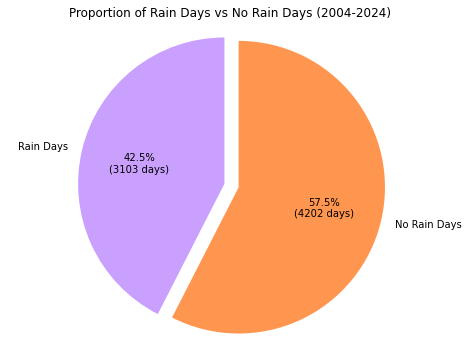

In [27]:
# filter the data between January 1, 2004 and January 1, 2024
start_date = '2004-01-01'
end_date = '2024-01-01'
filtered_df = df_prcp[(df_prcp['date'] >= start_date) & (df_prcp['date'] < end_date)]

rain_days = (filtered_df['precipitation'] > 0).sum()  
no_rain_days = (filtered_df['precipitation'] == 0).sum()  

labels = ['Rain Days', 'No Rain Days']
sizes = [rain_days, no_rain_days]
colors = ['xkcd:pastel purple', 'xkcd:pastel orange']


def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct * total / 100.0))
        return '{p:.1f}%\n({v:d} days)'.format(p=pct, v=val)
    return my_autopct

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct=make_autopct(sizes), startangle=90, explode=(0.1, 0))

# add title
plt.title('Proportion of Rain Days vs No Rain Days (2004-2024)')

# equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')


plt.show()


#### Findings

- The proportion of no rain days (57.5%) is larger than rain days (42.5%), indicating that over this period, Portland, OR experienced more dry days than rainy days.
- With 42.5% of days experiencing rain, this shows that Portland still has a significant number of rain days. This aligns with the city's reputation for having frequent rainfall, though not every day is rainy.

## Visualizing& Analyzing GWL Data

In [28]:
#insatll package
! pip install dataretrieval
#import libraries
import dataretrieval.nwis as nwis

### Collecting GWL data from USGS via NWIS

In [29]:
#data url:https://dashboard.waterdata.usgs.gov/app/nwd/en/?aoi=default
site="452912122312801"
display(nwis.get_record(sites=site,service='site'))

#get daily values
df_gwl=(nwis.get_record(sites=site,service='dv',start='2004-01-01', end='2024-01-01')).reset_index()

display(df_gwl.head())

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,452912122312801,01.00S/02.00E-14ABC01,GW,452911.27,1223133.92,45.486464,-122.526089,G,5,...,Y,C,YYYNNYNN,N100WLMLWD,121TRDL,U,59,63,D,4741-17500


,datetime,site_no,72019_Mean,72019_Mean_cd
0,2004-01-01 00:00:00+00:00,452912122312801,45.86,A
1,2004-01-02 00:00:00+00:00,452912122312801,45.95,A
2,2004-01-03 00:00:00+00:00,452912122312801,46.02,A
3,2004-01-04 00:00:00+00:00,452912122312801,46.04,A
4,2004-01-05 00:00:00+00:00,452912122312801,45.91,A


In [30]:
#extracting required columns
df_gwl=df_gwl[['datetime','72019_Mean']]
df_gwl.columns=['date','gwl']
df_gwl.head()

,date,gwl
0,2004-01-01 00:00:00+00:00,45.86
1,2004-01-02 00:00:00+00:00,45.95
2,2004-01-03 00:00:00+00:00,46.02
3,2004-01-04 00:00:00+00:00,46.04
4,2004-01-05 00:00:00+00:00,45.91


In [31]:
#extracting the date from datetime
df_gwl['date']=df_gwl['date'].dt.date
df_gwl.head()

,date,gwl
0,2004-01-01,45.86
1,2004-01-02,45.95
2,2004-01-03,46.02
3,2004-01-04,46.04
4,2004-01-05,45.91


In [32]:
df_gwl.describe()

,gwl
count,7087.000000
mean,42.454398
std,2.168050
min,36.160000
25%,40.860000
50%,42.540000
75%,43.980000
max,48.780000


In [33]:
# checking for missing data
df_gwl.isnull().sum()

date    0
gwl     0
dtype: int64

### Visualizing and Analtzing GWL Data

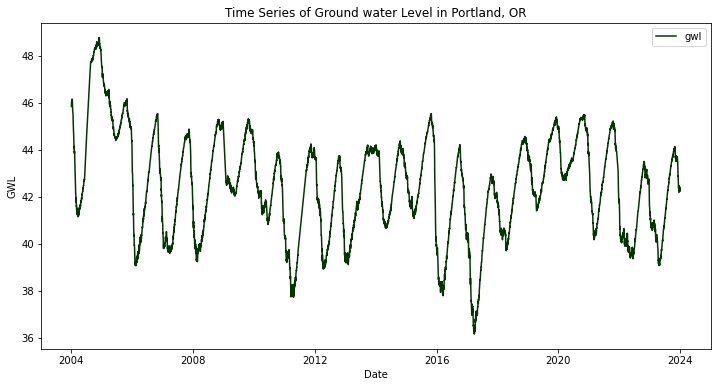

In [34]:
#plot the time series
fig,ax =plt.subplots(figsize=(12,6))

df_gwl.plot(x='date',y='gwl',ax=ax,color='xkcd:dark green')
plt.title('Time Series of Ground water Level in Portland, OR')
plt.xlabel('Date')
plt.ylabel('GWL')
plt.legend()
plt.show()

ERROR: Could not find a version that satisfies the requirement scipy.stats (from versions: none)
ERROR: No matching distribution found for scipy.stats


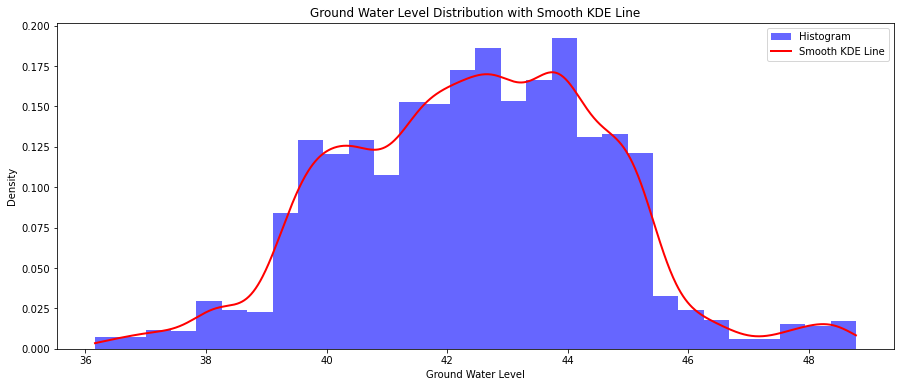

In [35]:
!pip install scipy.stats

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde


gwl_data = df_gwl['gwl'].dropna()
gwl_data = gwl_data.values

# Create the histogram
plt.figure(figsize=(15, 6))
plt.hist(gwl_data, bins=30, color='blue', alpha=0.6, density=True, label='Histogram')  # Normalized histogram
kde = gaussian_kde(gwl_data)

x_vals = np.linspace(gwl_data.min(), gwl_data.max(), 1000)
plt.plot(x_vals, kde(x_vals), color='red', lw=2, label='Smooth KDE Line')


plt.title('Ground Water Level Distribution with Smooth KDE Line')
plt.xlabel('Ground Water Level')
plt.ylabel('Density')
plt.legend()

plt.show()


#### Findings

- The groundwater levels fluctuate seasonally, with peaks during wet periods and troughs during dry periods, indicating that groundwater levels in Portland are largely influenced by seasonal precipitation.
- While there are seasonal fluctuations, the overall range of groundwater levels has remained fairly consistent over time.
- The distribution is spread out, indicating variability in the groundwater levels, with the most frequent levels occurring around 42 and 44.
- Extreme groundwater levels (either very low or very high) are less common, as indicated by the flat tails of the distribution.

## Summary

The climate data analysis for Portland Airport reveals several important trends in air temperature, precipitation, and groundwater levels between 2004 and 2024. Air temperature data shows a consistent seasonal pattern, with both minimum and maximum temperatures peaking in the summer and dipping in the winter. The analysis highlights the hottest day during this period, June 28, 2021, and the coldest day, January 13, 2017. Precipitation data, on the other hand, indicates that while Portland is known for its rainy weather, more than half (57.5%) of the days had no precipitation, though rain events were frequent and significant. Groundwater level data shows seasonal fluctuations corresponding with precipitation patterns, with the most common groundwater levels ranging from 42 to 44 feet. Overall, the analysis suggests that Portland has seen an increase in hot days and relatively stable groundwater levels, likely reflecting the impact of climate variability and change.